In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import statistics as stat
%matplotlib  inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### ***Q1.Find out how many males and females participated in test***

In [4]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


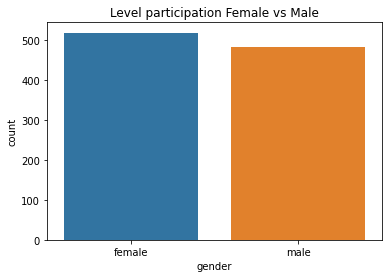

In [5]:
sns.countplot(df['gender'])
plt.title('Level participation Female vs Male')
plt.show()

### ***Q2.What do you think about the student's parental leval od education?***

In [6]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


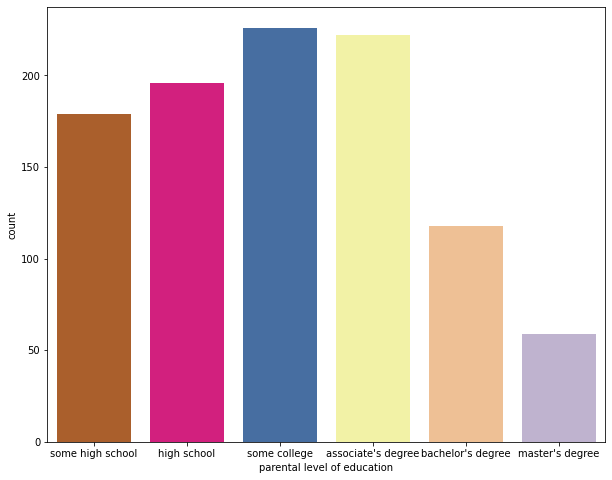

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(df['parental level of education'],palette ='Accent_r')
plt.xlabel('parental level of education')
plt.ylabel('count')

plt.show()



*   Most of the parents have degree level of education(some college/associate degree/bachelor degree)
*   A very few have a master degree.





### ***Q3. who scores the most on averge for math,reading and writing based on***

### ***1.   Gender***
### ***2. Test preparation course***

In [8]:
df1=df[['gender','math score','writing score','reading score']].groupby(['gender']).agg(['mean'])
df1




,math score,writing score,reading score
,mean,mean,mean
gender,,,
female,63.376448,72.467181,72.590734
male,68.821577,63.446058,65.545643




*   Female students have a better average score for writing and reading compared to male students
*    Males have a better math average score that of female students.



In [9]:
df2=df[['test preparation course','math score','writing score','reading score',]].groupby(['test preparation course']).agg('mean')
df2

,math score,writing score,reading score
test preparation course,,,
completed,69.96648,74.684358,74.175978
none,63.78972,64.457944,66.417445




*   In every subject irrespective of gender those who completed a test preparation course has a upper hand.
*   



### ***Q4.Scoring variation for math,reading,writing based on***

### ***1.Gender***

### ***2.Test preparation course***



In [10]:
df3=df.groupby('gender')['math score']
df3.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0


In [11]:
df4=df.groupby('gender')['writing score']
df4.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.0,100.0
male,482.0,63.446058,14.227225,15.0,53.0,64.0,74.0,100.0


In [12]:
df5=df.groupby('gender')['reading score']
df5.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.590734,14.411018,17.0,63.25,73.0,83.0,100.0
male,482.0,65.545643,14.149594,23.0,56.00,66.0,76.0,100.0


In [13]:
df[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('std')

math score  writing score  reading score
test preparation course gender                                          
completed               female   14.428233      12.240788      12.695493
                        male     14.039164      12.887910      13.612420
none                    female   16.510686      15.016497      14.636981
                        male     14.335746      13.468284      13.595718

In [14]:
df[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('mean')

math score  writing score  reading score
test preparation course gender                                          
completed               female   67.108696      78.793478      77.375000
                        male     72.988506      70.339080      70.793103
none                    female   61.320359      68.982036      69.955090
                        male     66.467532      59.551948      62.581169



*   Female and male students have almost same std deviation for reading and writing except in the case of math score.

*   There is a higher variation in math score of female students than male students.
* There is an improvement in the score of female and male students who took a test preparation course.  



### ***Q5.Top 25% of students based on the math score***

In [15]:
top25=df['math score'].nlargest(250)

In [16]:
top25

515    100
516    100
517    100
996    100
997    100
      ... 
428     77
429     77
849     77
850     77
851     77
Name: math score, Length: 250, dtype: int64

In [17]:
df['math score'].describe()

count    1000.000000
mean       66.001000
std        15.569567
min         0.000000
25%        57.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

In [18]:
top25.nlargest(1)

515    100
Name: math score, dtype: int64

In [19]:
top25.nsmallest(1)

414    77
Name: math score, dtype: int64

In [20]:
top25.value_counts()

79     22
81     22
77     19
82     18
80     17
87     16
78     15
88     15
85     14
84     11
91      9
90      9
86      8
83      8
94      7
100     7
92      6
89      6
97      6
93      4
99      3
96      3
98      3
95      2
Name: math score, dtype: int64



*   This data contain scores of 1000 students.Top 25% of students based on their math score contains top 250 students who scored between 100 to 77.


